In [3]:
import matplotlib.pylab as pl
%matplotlib inline
import minpy.numpy as np
from scipy.stats import norm as gaussian
import sys
sys.path.append('../nn')
from std_estimator import infer_std

In [10]:
limit = 0.5
activations = {
    'ReLU'             : lambda X: np.maximum(0, X),
    'sigmoid'          : lambda X: 1 / (1 + np.exp(-X)),
    'symmetric DReLU'  : lambda X: np.minimum(limit, np.maximum(-limit, X)),
    'asymmetric DReLU' : lambda X: np.minimum(1, np.maximum(0, X))
}
activation = 'asymmetric DReLU'

In [7]:
sys.path.append('../cifar10')
from utilities.data_utility import load_cifar10
data = load_cifar10('../cifar10/utilities/cifar/', center=True, rescale=True)

In [44]:
# X = np.random.normal(0, 1, (10000, 3072))
X = np.copy(data[2])
# D = [3072, 1024, 512, 256, 128, 64, 16]
D = (3072,) + (1024,) * 100 + (10,)

REPEAT = 3

weights = []
weight_shapes = tuple((D[i], D[i + 1]) for i in range(len(D) - 1))
inputs = X
for index, shape in enumerate(weight_shapes):
#     std = infer_std(inputs, shape)
#     weight = sum(np.random.normal(0, std, shape) for i in range(REPEAT)) / float(REPEAT)
    
    print 'layer', index
    
    E_X_2 = np.mean(inputs ** 2)
    std = 1 / (shape[0] * E_X_2) ** 0.5
    
    weight = np.random.normal(0, std, shape)
    weights.append(weight)
    
    inputs = np.dot(inputs, weight)
    inputs = activations[activation](inputs)

layer 0
layer 1
layer 2
layer 3
layer 4
layer 5
layer 6
layer 7
layer 8
layer 9
layer 10
layer 11
layer 12
layer 13
layer 14
layer 15
layer 16
layer 17
layer 18
layer 19
layer 20
layer 21
layer 22
layer 23
layer 24
layer 25
layer 26
layer 27
layer 28
layer 29
layer 30
layer 31
layer 32
layer 33
layer 34
layer 35
layer 36
layer 37
layer 38
layer 39
layer 40
layer 41
layer 42
layer 43
layer 44
layer 45
layer 46
layer 47
layer 48
layer 49
layer 50
layer 51
layer 52
layer 53
layer 54
layer 55
layer 56
layer 57
layer 58
layer 59
layer 60
layer 61
layer 62
layer 63
layer 64
layer 65
layer 66
layer 67
layer 68
layer 69
layer 70
layer 71
layer 72
layer 73
layer 74
layer 75
layer 76
layer 77
layer 78
layer 79
layer 80
layer 81
layer 82
layer 83
layer 84
layer 85
layer 86
layer 87
layer 88
layer 89
layer 90
layer 91
layer 92
layer 93
layer 94
layer 95
layer 96
layer 97
layer 98
layer 99
layer 100


layer 0
layer 1
layer 2
layer 3
layer 4
layer 5
layer 6
layer 7
layer 8
layer 9
layer 10
layer 11
layer 12
layer 13
layer 14
layer 15
layer 16
layer 17
layer 18
layer 19


/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


layer 20
layer 21
layer 22
layer 23
layer 24
layer 25
layer 26
layer 27
layer 28
layer 29
layer 30
layer 31
layer 32
layer 33
layer 34
layer 35
layer 36
layer 37
layer 38
layer 39
layer 40
layer 41
layer 42
layer 43
layer 44
layer 45
layer 46
layer 47
layer 48
layer 49
layer 50
layer 51
layer 52
layer 53
layer 54
layer 55
layer 56
layer 57
layer 58
layer 59
layer 60
layer 61
layer 62
layer 63
layer 64
layer 65
layer 66
layer 67
layer 68
layer 69
layer 70
layer 71
layer 72
layer 73
layer 74
layer 75
layer 76
layer 77
layer 78
layer 79
layer 80
layer 81
layer 82
layer 83
layer 84
layer 85
layer 86
layer 87
layer 88
layer 89
layer 90
layer 91
layer 92
layer 93
layer 94
layer 95
layer 96
layer 97
layer 98
layer 99
layer 100


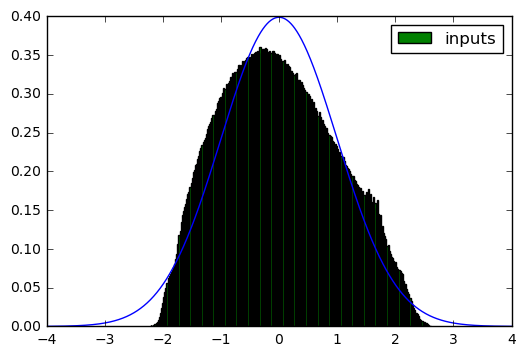

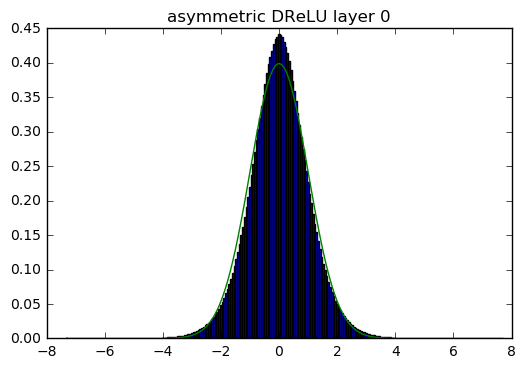

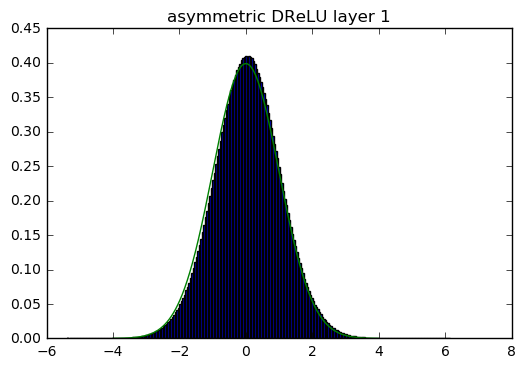

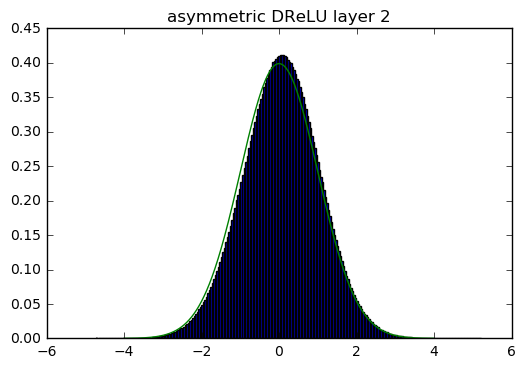

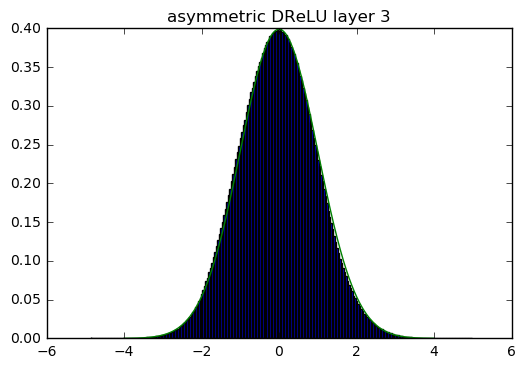

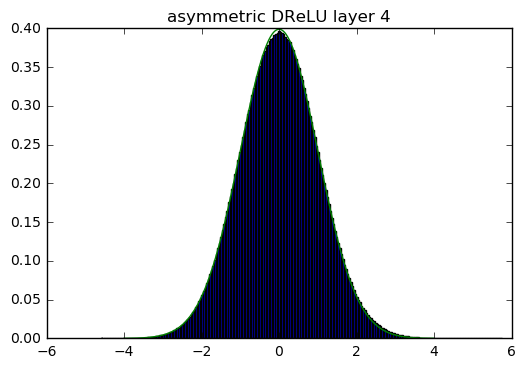

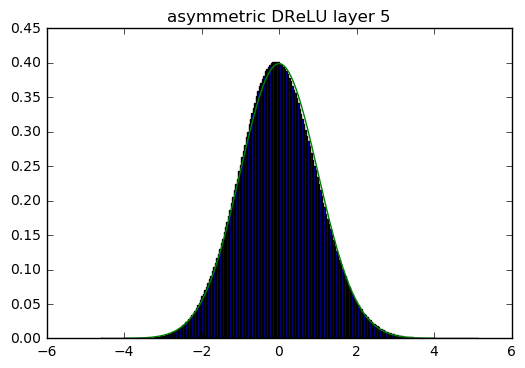

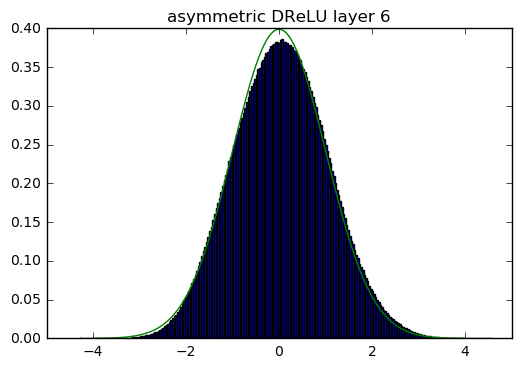

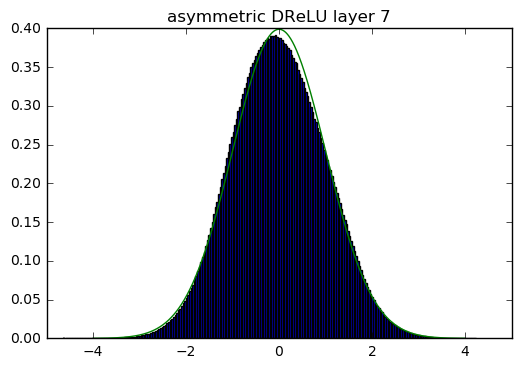

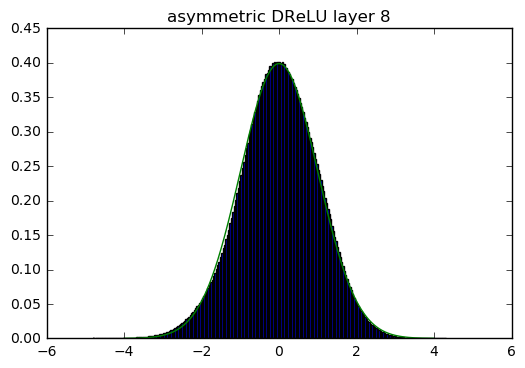

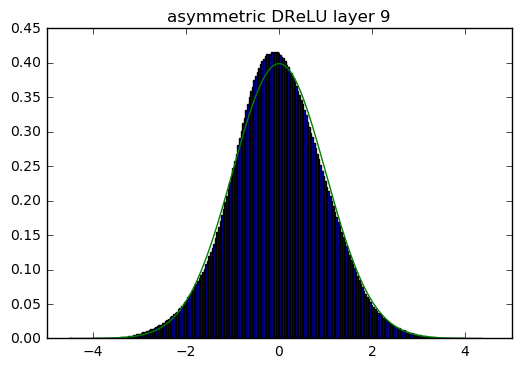

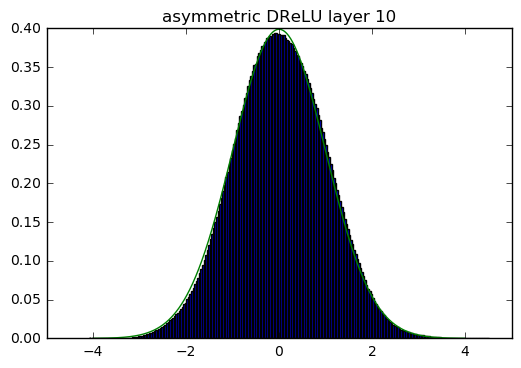

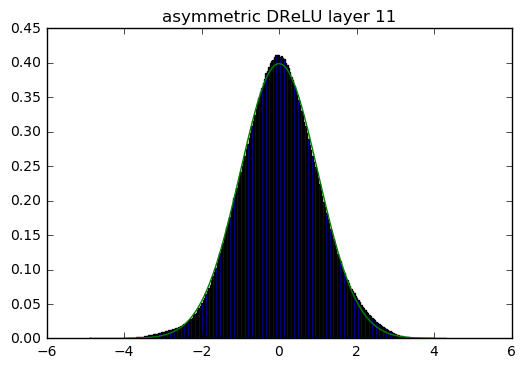

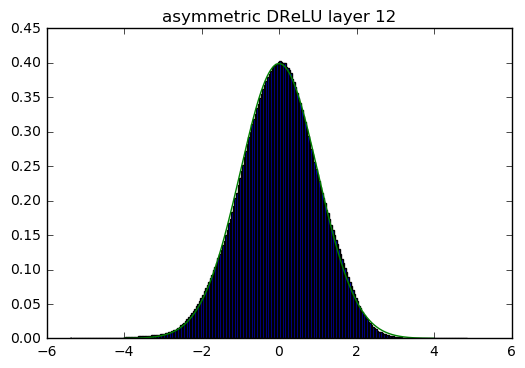

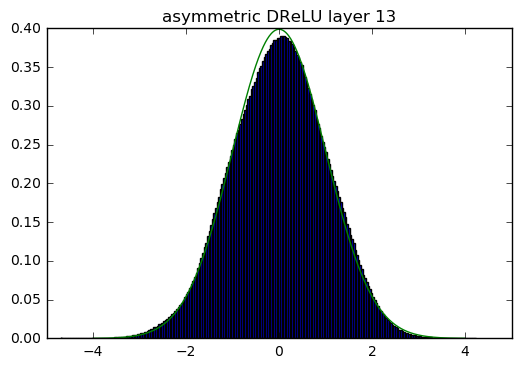

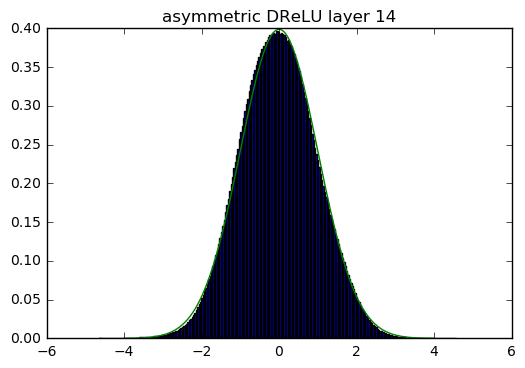

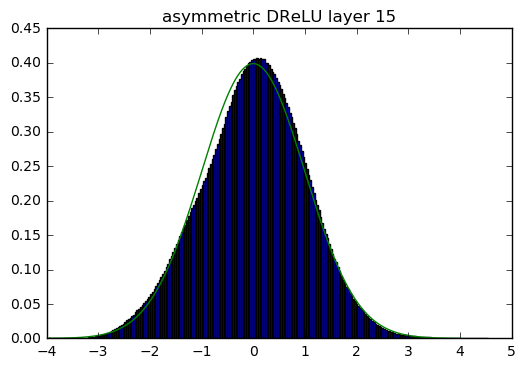

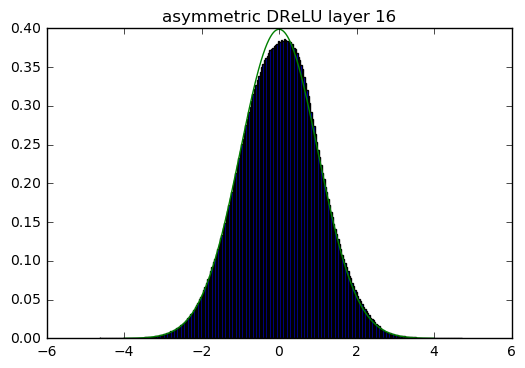

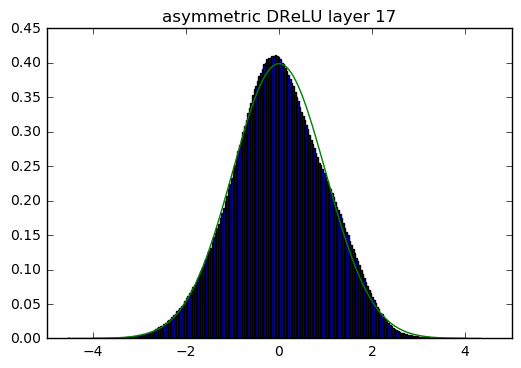

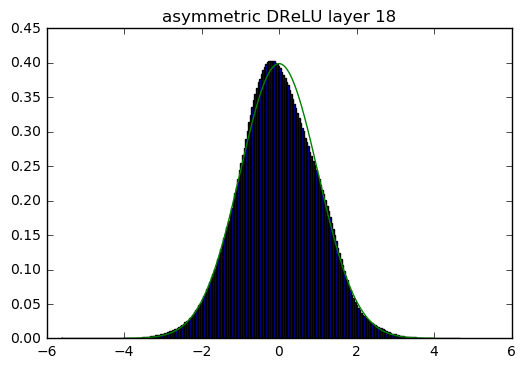

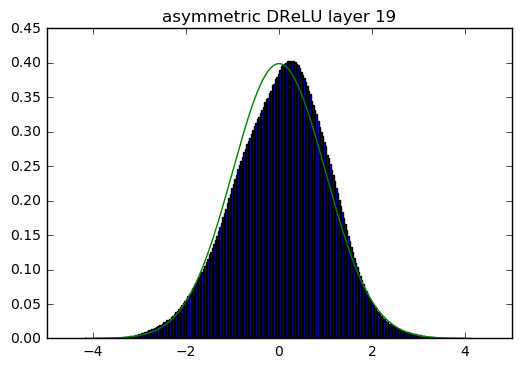

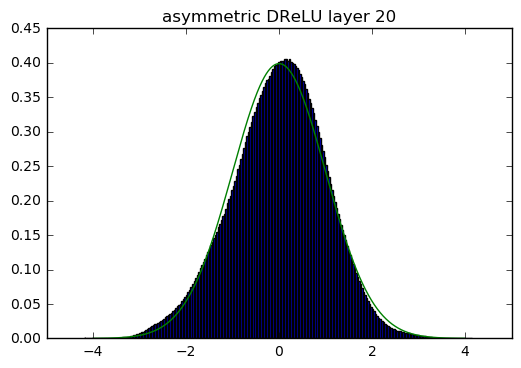

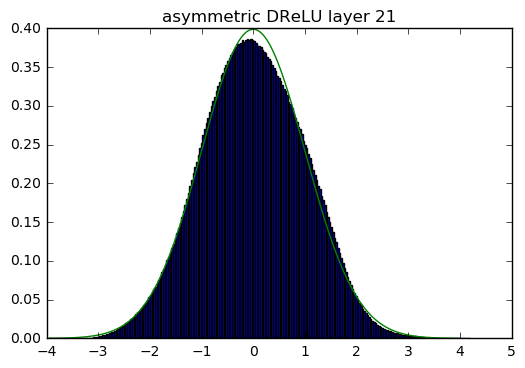

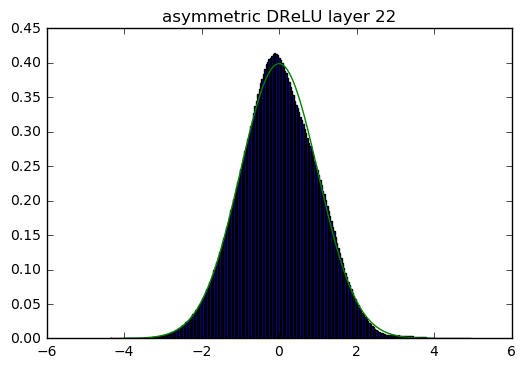

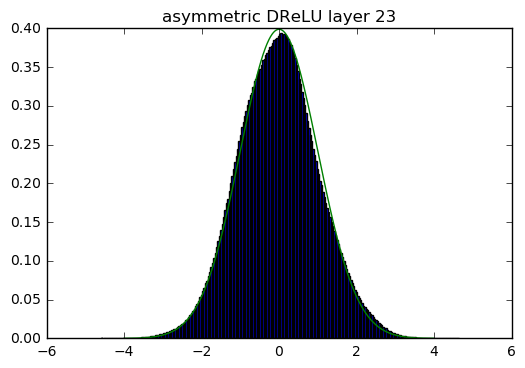

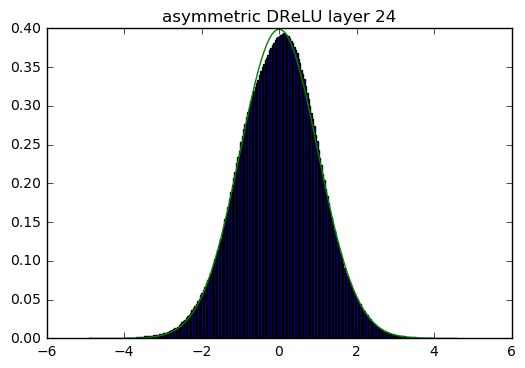

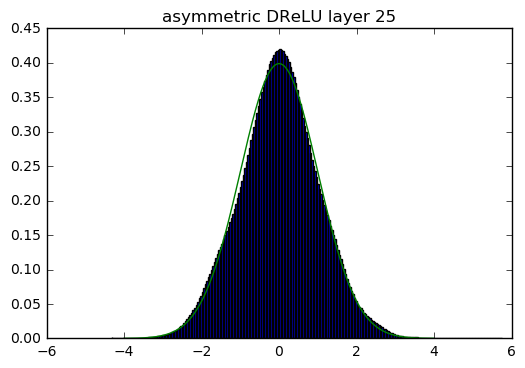

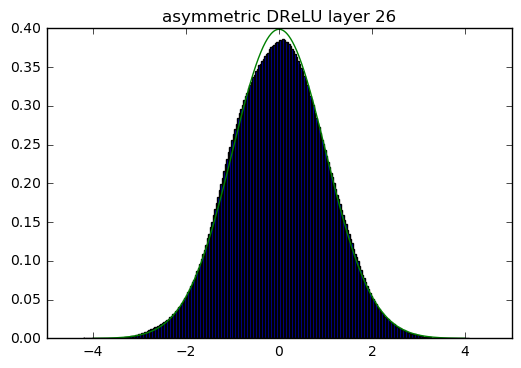

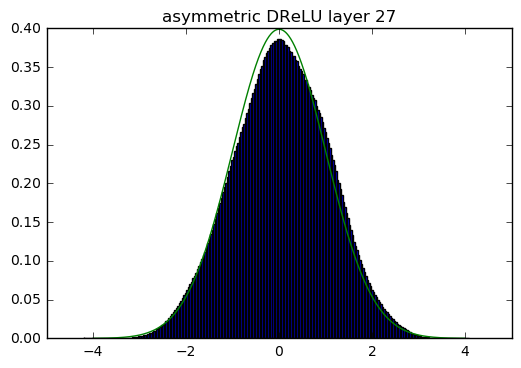

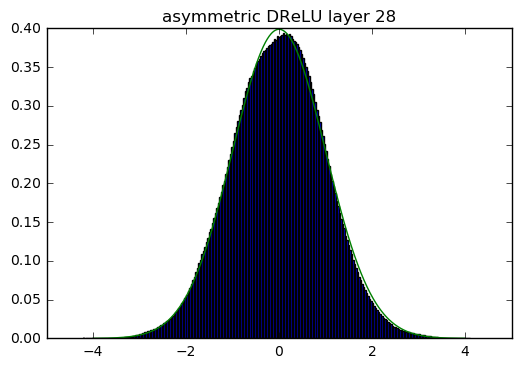

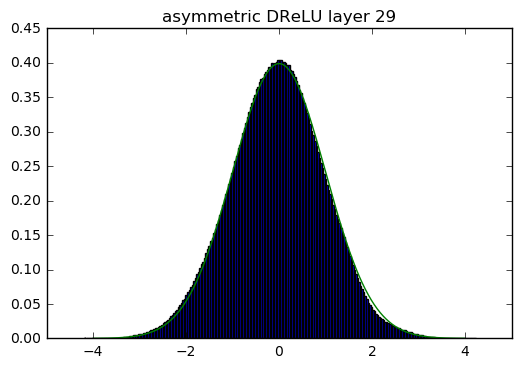

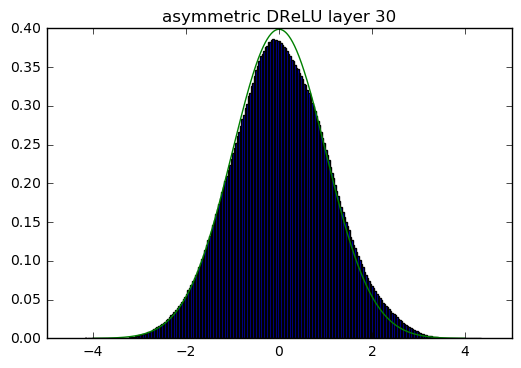

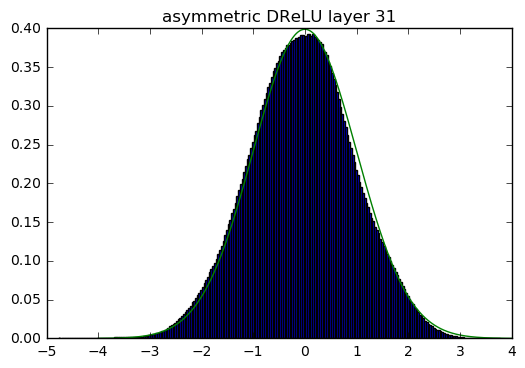

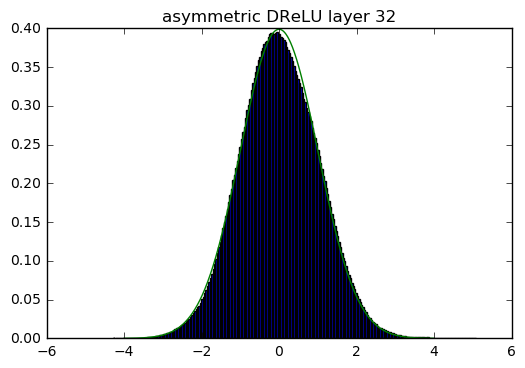

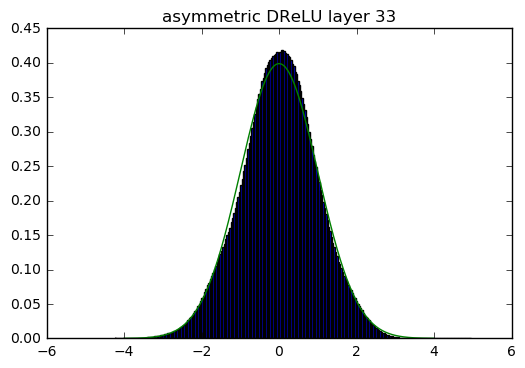

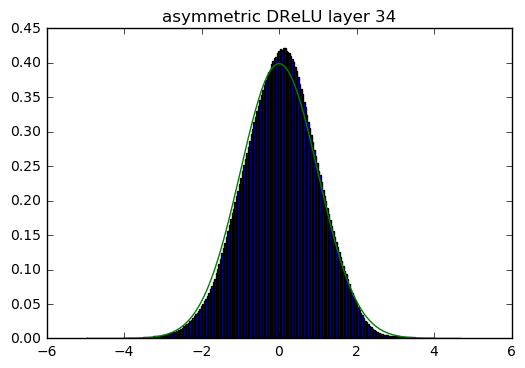

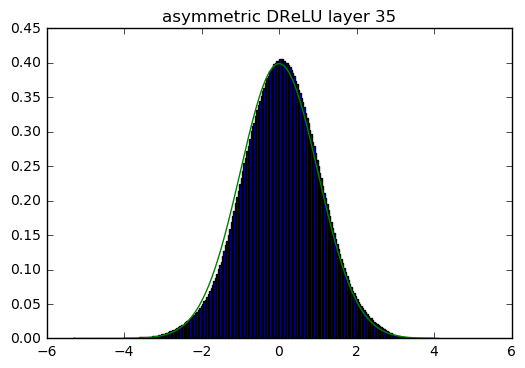

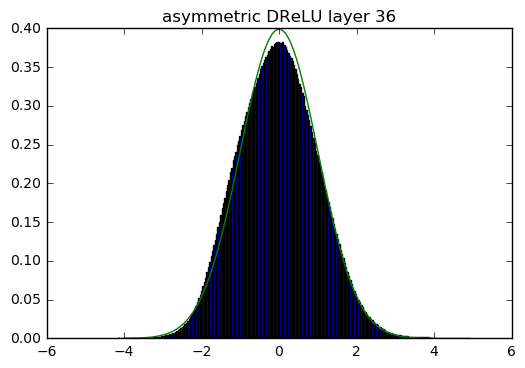

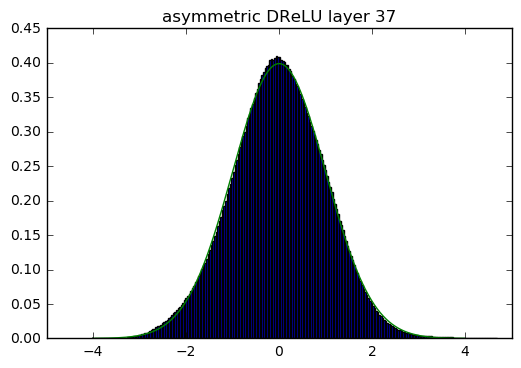

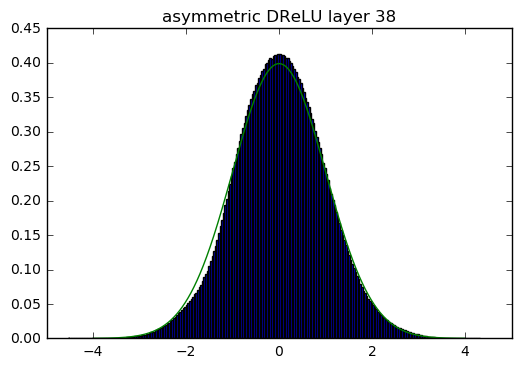

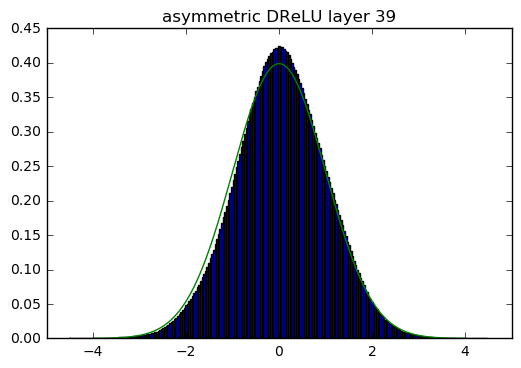

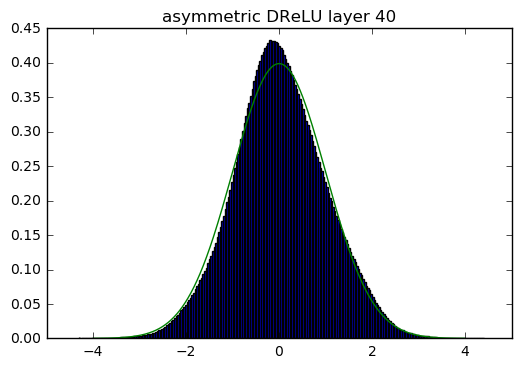

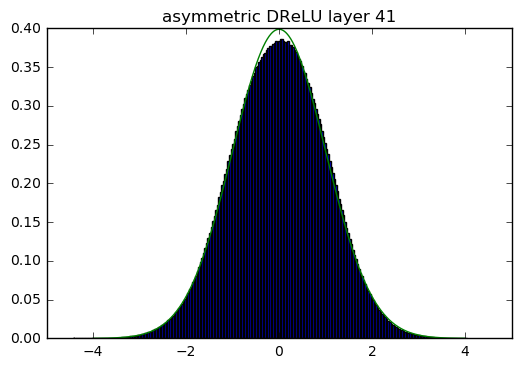

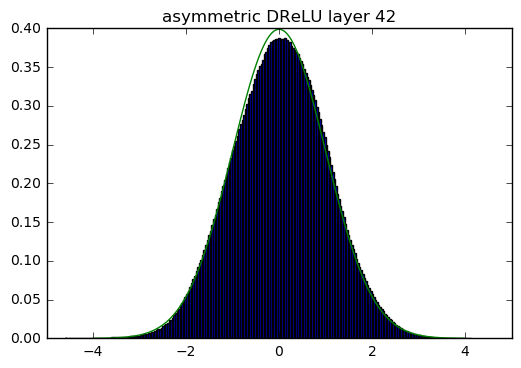

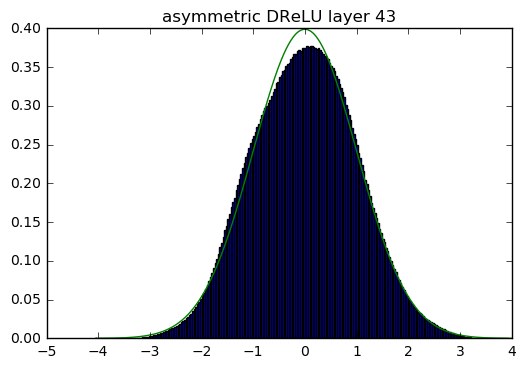

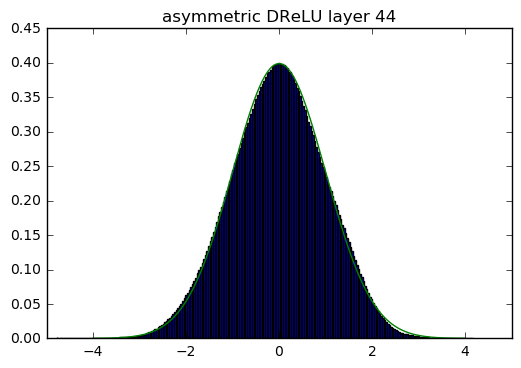

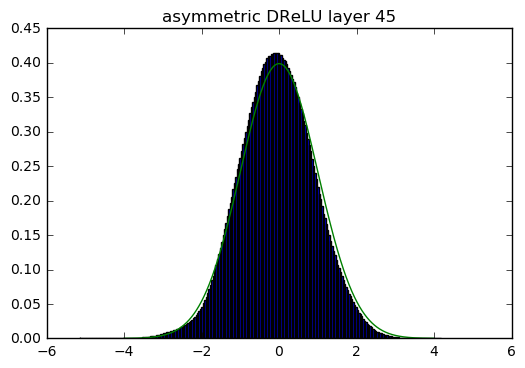

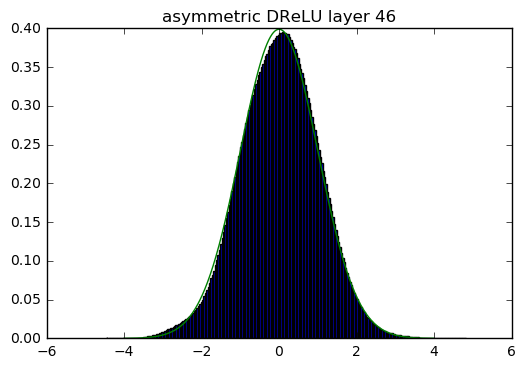

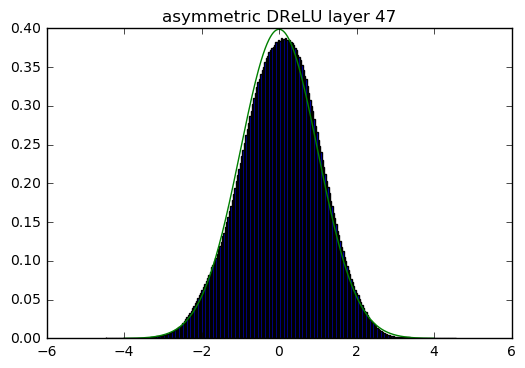

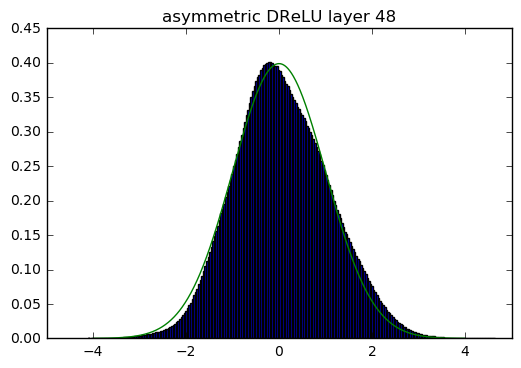

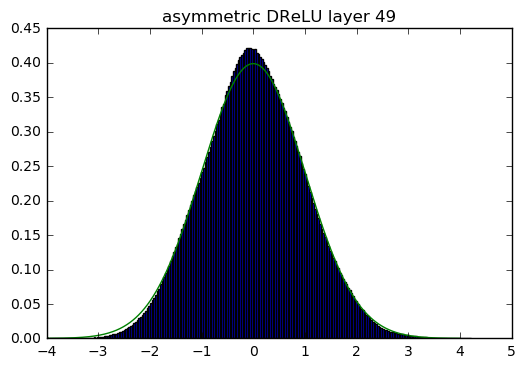

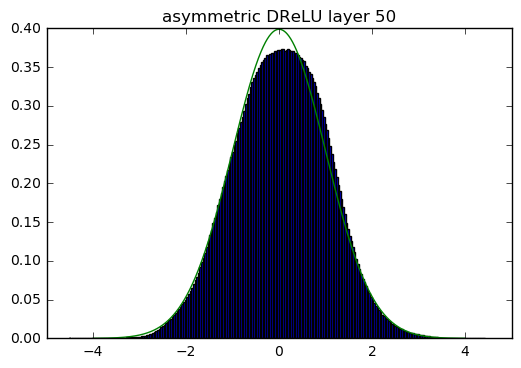

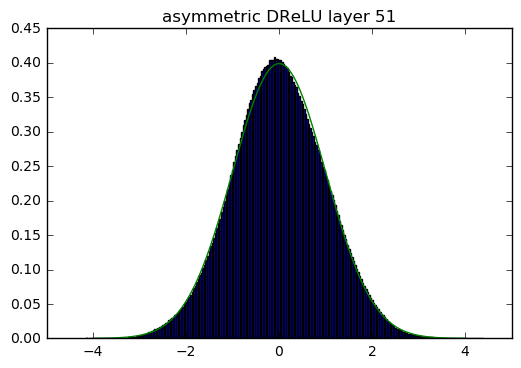

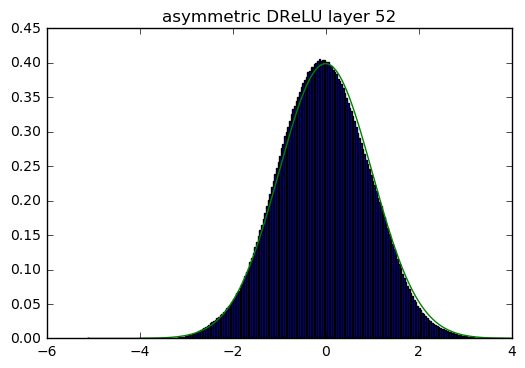

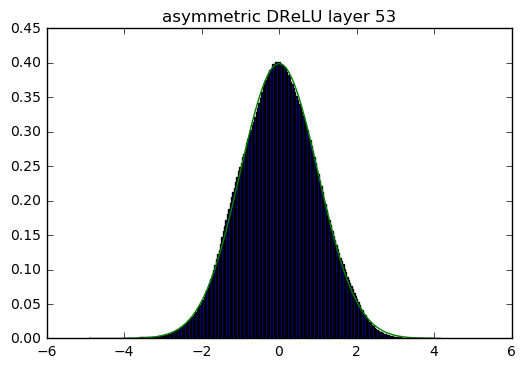

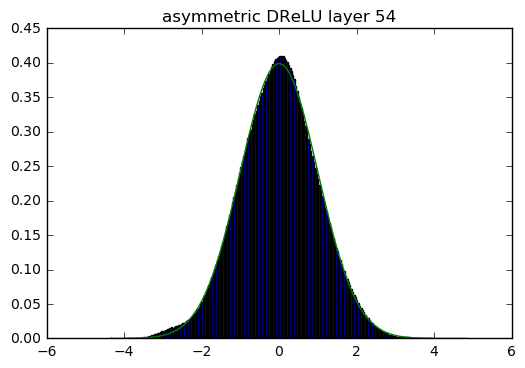

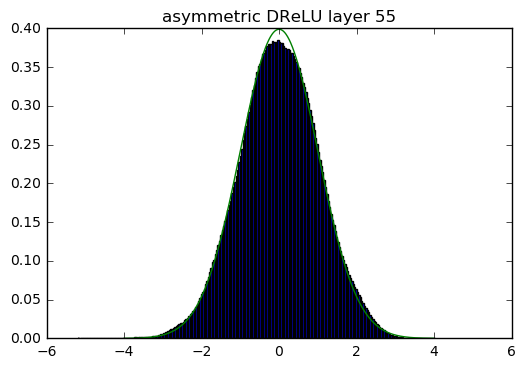

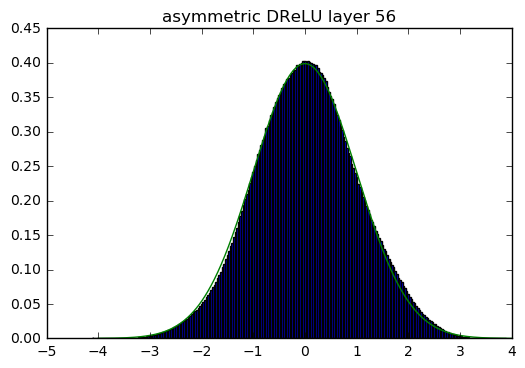

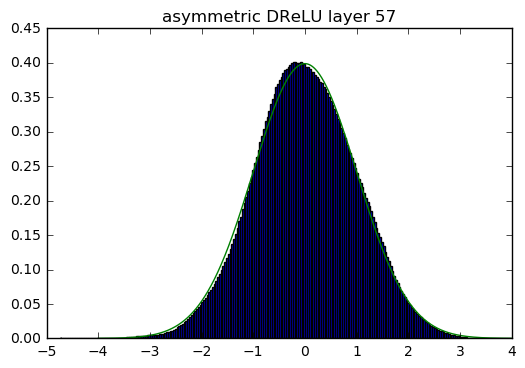

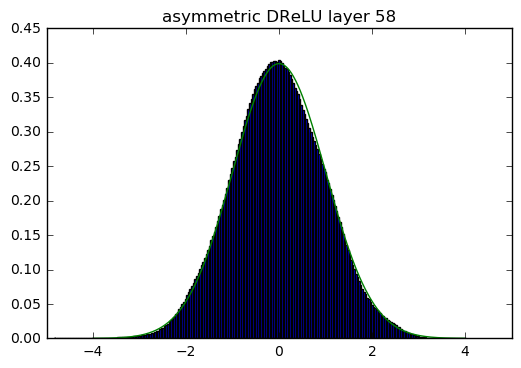

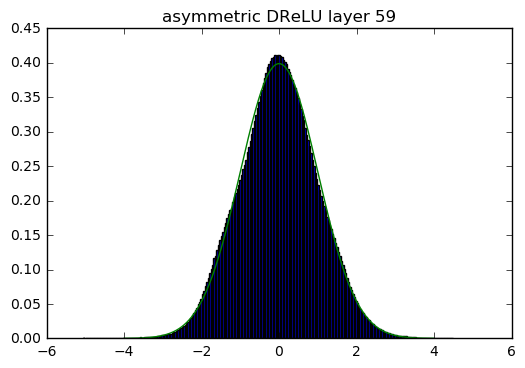

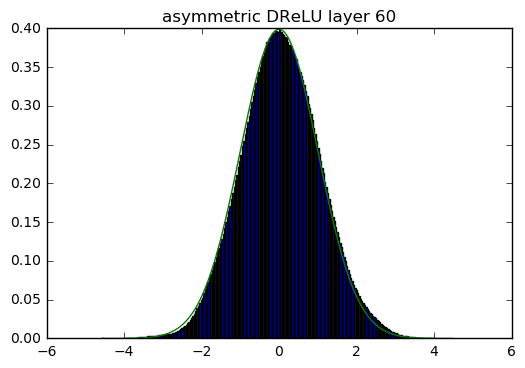

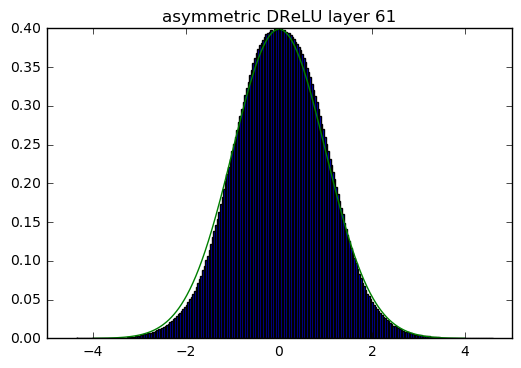

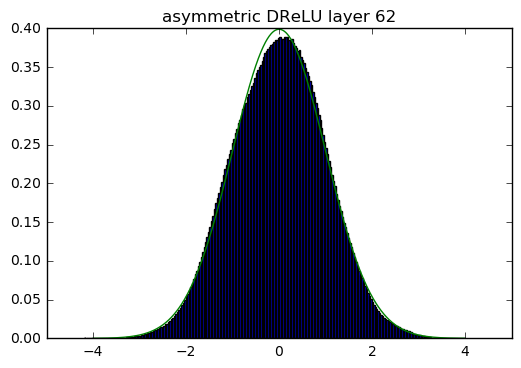

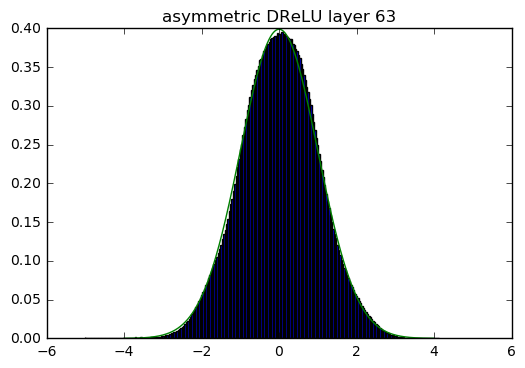

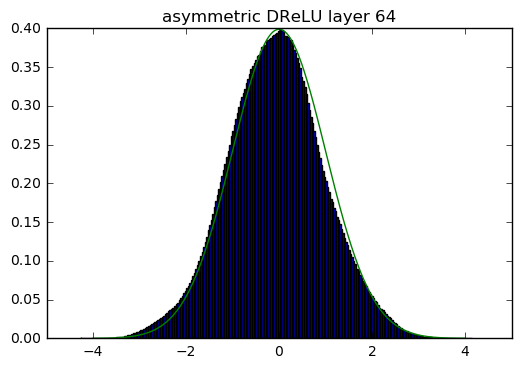

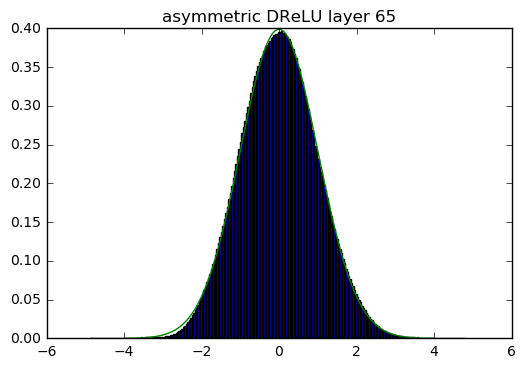

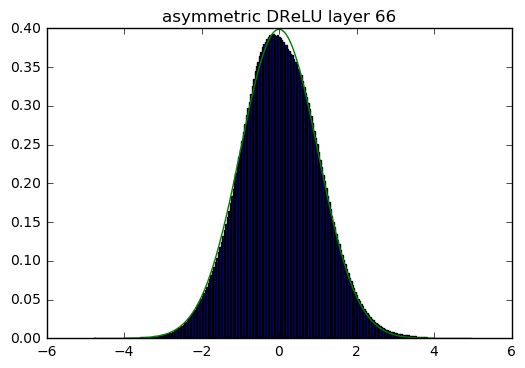

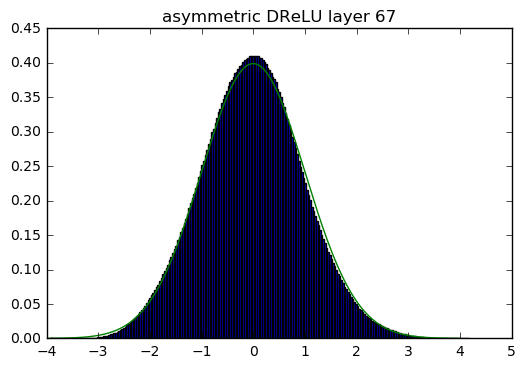

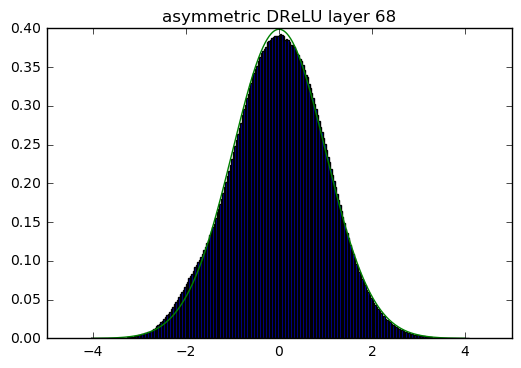

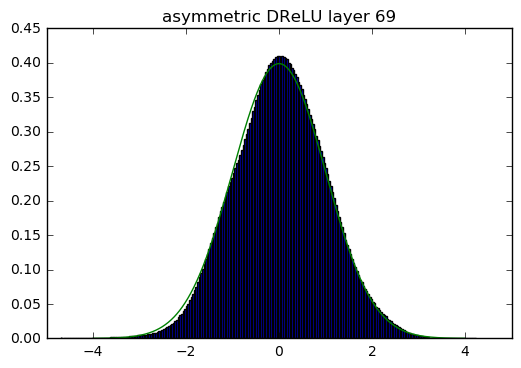

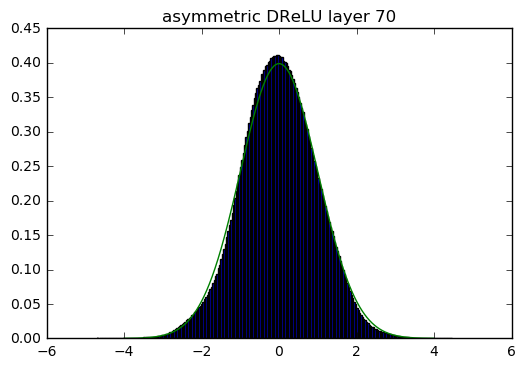

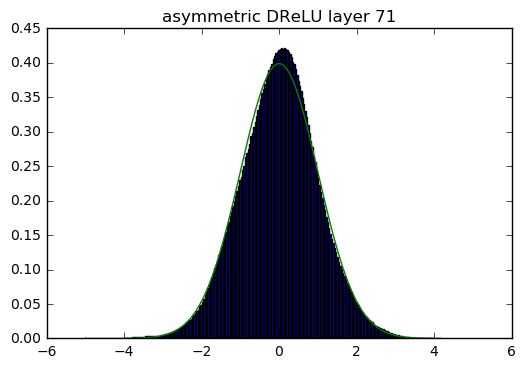

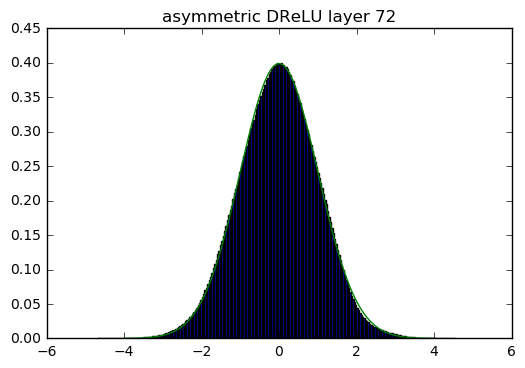

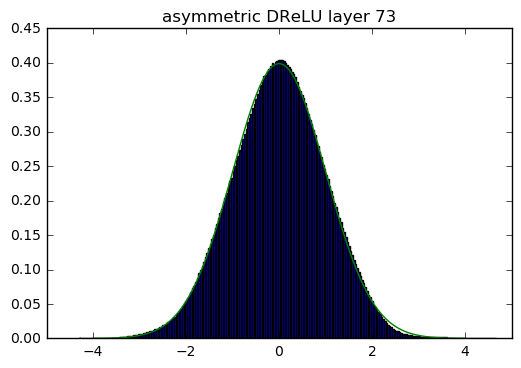

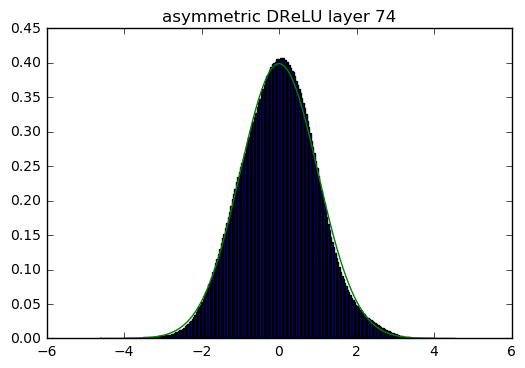

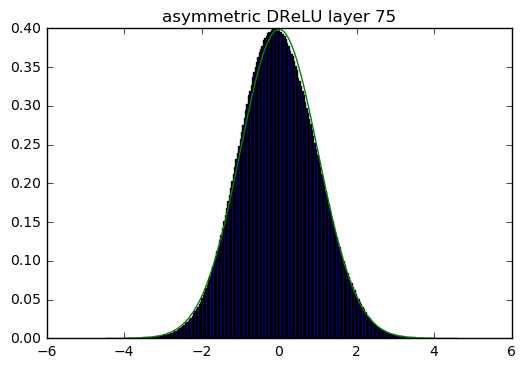

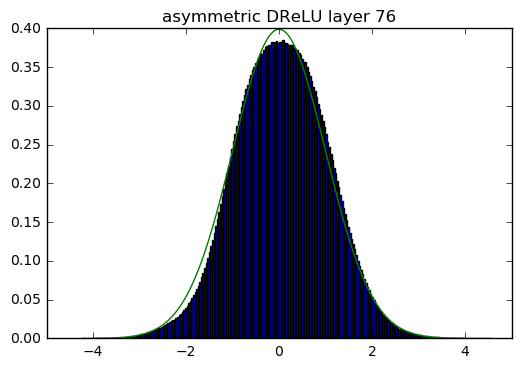

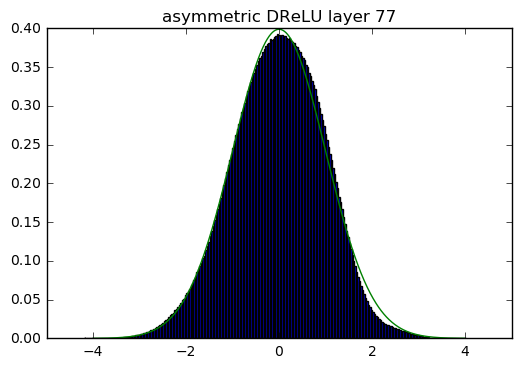

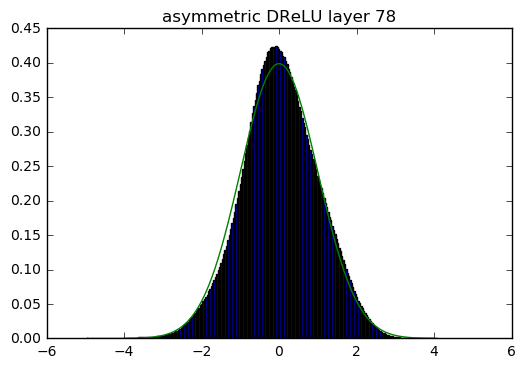

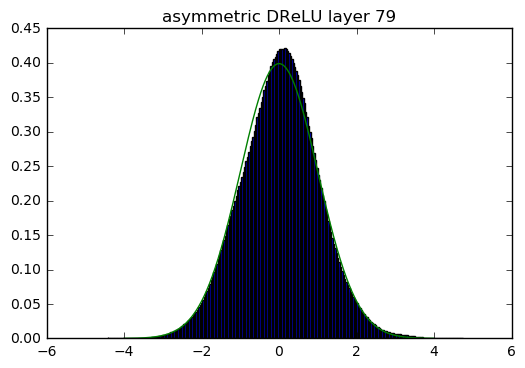

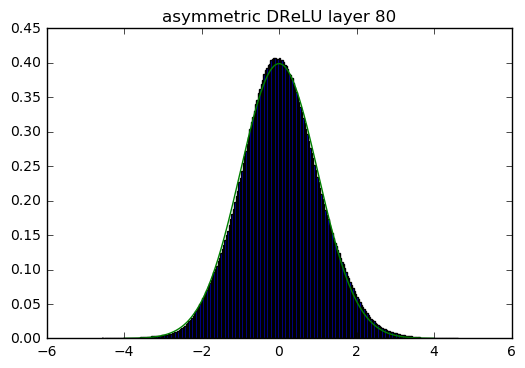

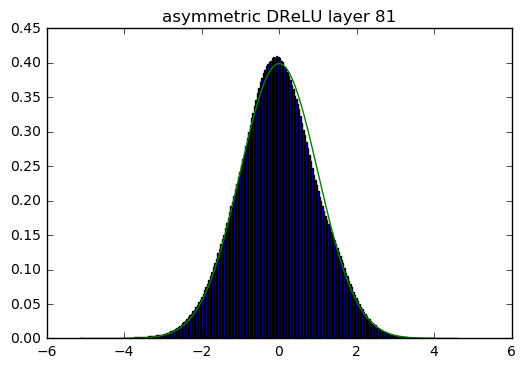

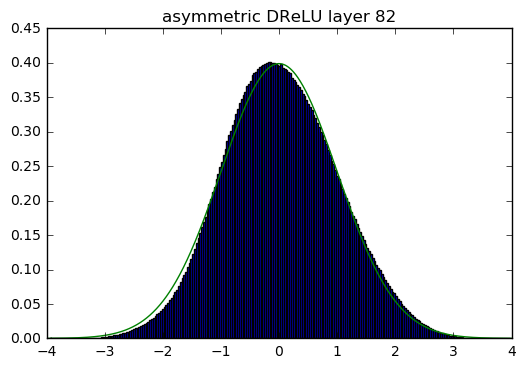

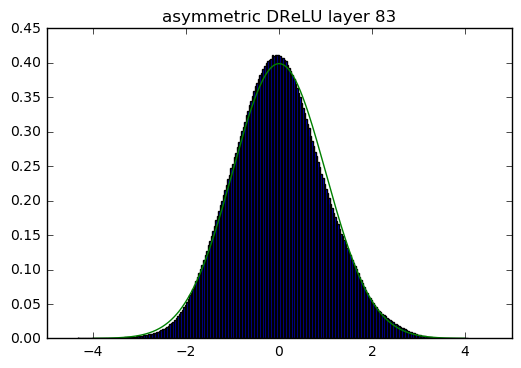

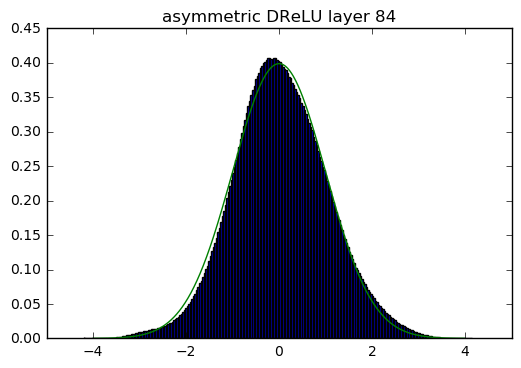

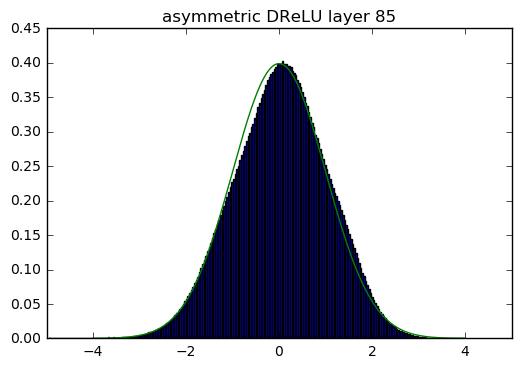

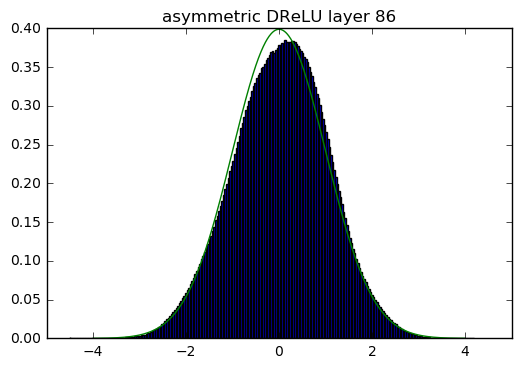

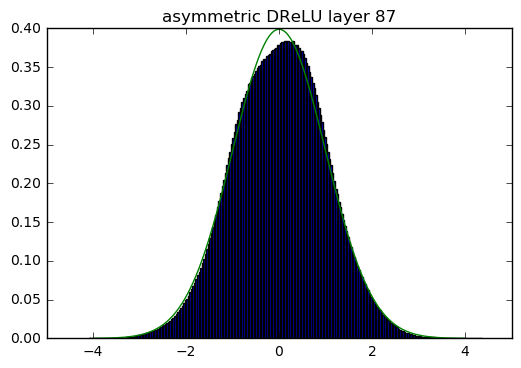

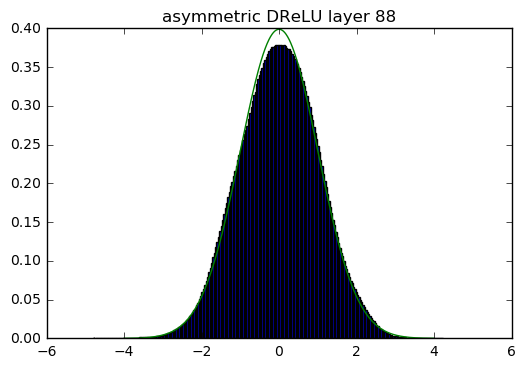

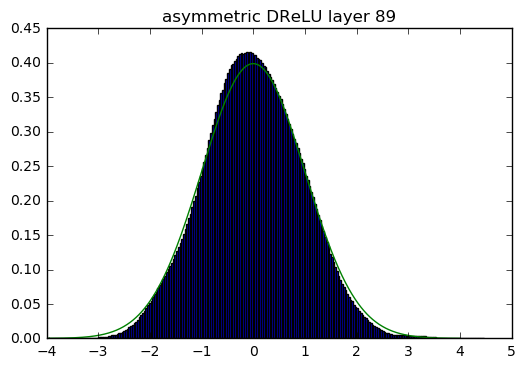

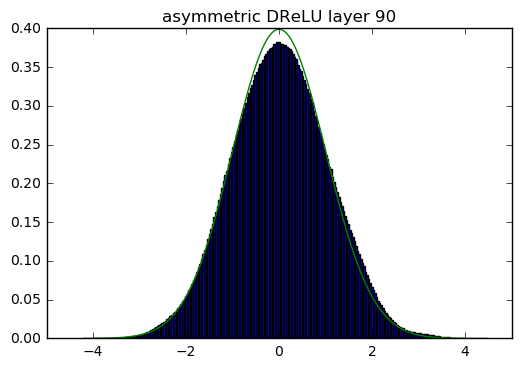

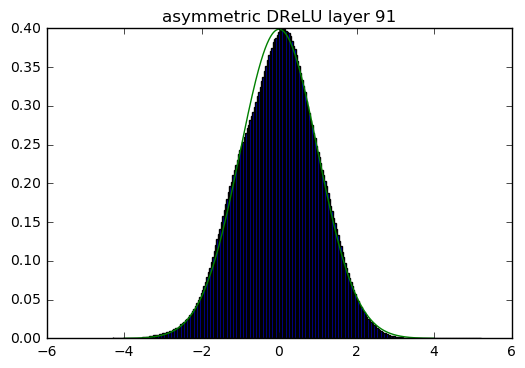

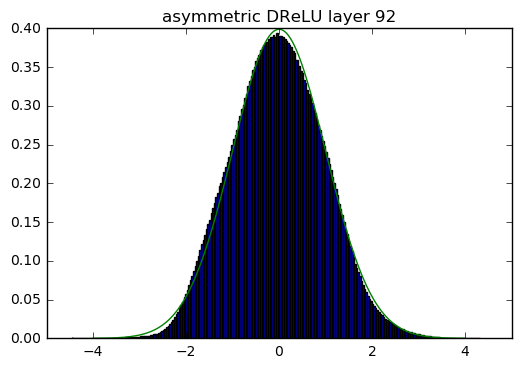

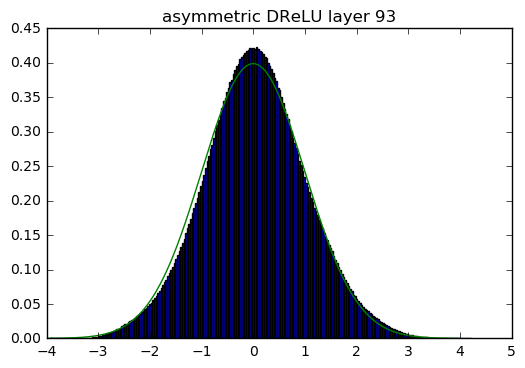

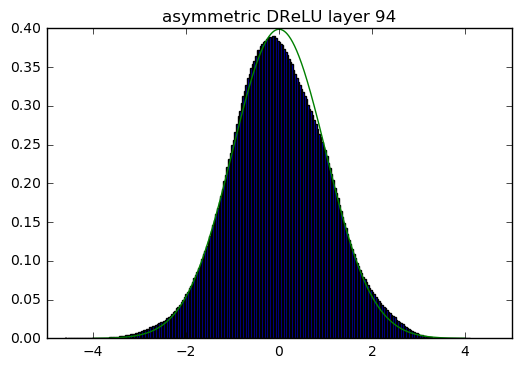

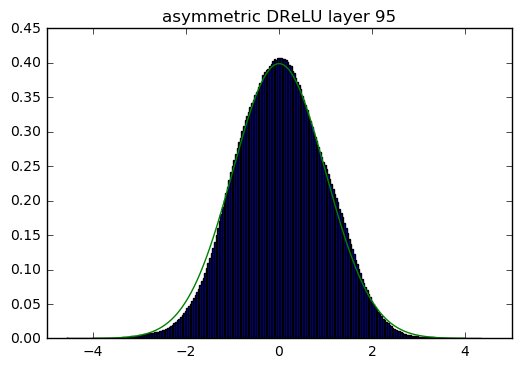

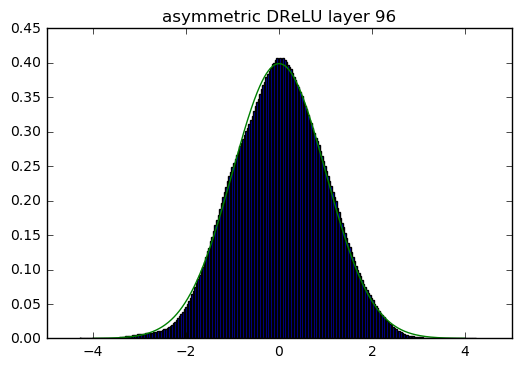

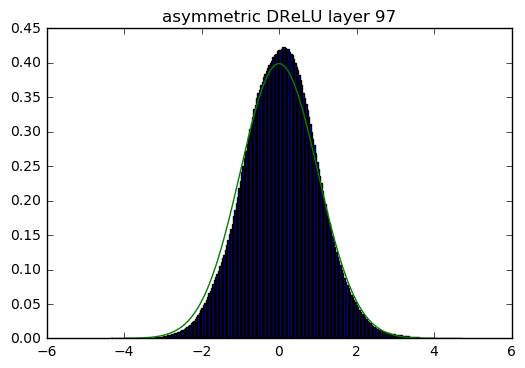

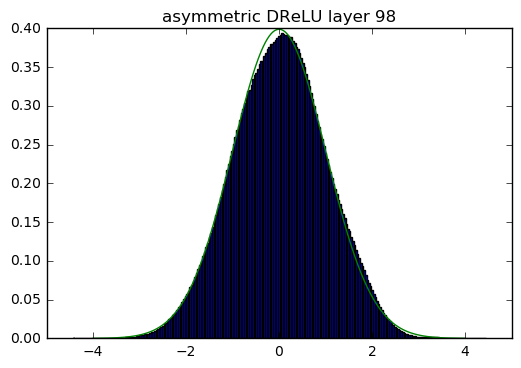

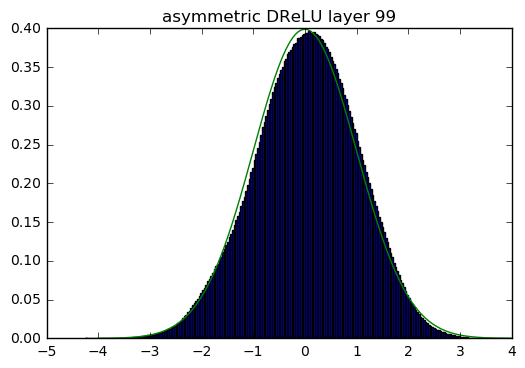

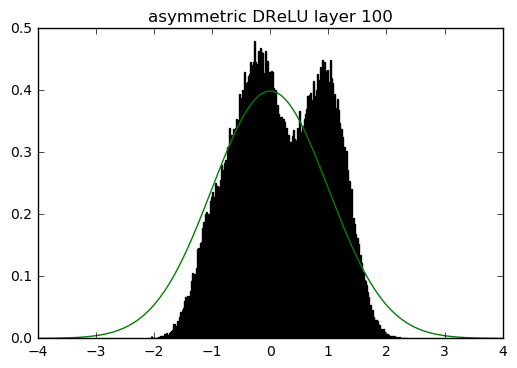

In [45]:
BINS = 256
linespace = np.linspace(-4, 4, 1000).asnumpy()

inputs = X
pl.plot(linespace, gaussian.pdf(linespace))
pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True, label='inputs')
pl.legend()
for index, W in enumerate(weights):
    print 'layer', index
    inputs = np.dot(inputs, W)
    pl.figure()
    pl.title('%s layer %d' % (activation, index))
    pl.hist(inputs.asnumpy().flatten(), bins=BINS, normed=True)
    pl.plot(linespace, gaussian.pdf(linespace))
        
    if index != len(weights) - 1:
        inputs = activations[activation](inputs)

In [35]:
from minpy.core import grad_and_loss as gradient_loss
from minpy.nn.layers import softmax_loss

In [42]:
training_labels = np.zeros((len(data[3]), data[3].max() - data[3].min() + 1))
training_labels[np.arange(len(data[3])), data[3]] = 1

In [37]:
def loss_function(*args):
    return softmax_loss(inputs, training_labels)
gl = gradient_loss(loss_function, range(len(weights)))
gradients, _ = gl(*weights)

In [40]:
for index, gradient in enumerate(gradients):
    print np.min(gradient), np.max(gradient)
#     pl.figure()
#     pl.hist(gradient.asnumpy().flatten(), bins=BINS, normed=True)
#     pl.title('W%d gradient' % index)

[ 0.] [ 0.]
[ 0.] [ 0.]
[ 0.] [ 0.]
[ 0.] [ 0.]
